In [218]:
import pandas as pd

In [219]:
import numpy as np

In [220]:
import matplotlib.pyplot as plt

%matplotlib inline

In [221]:
import seaborn as sns

In [222]:
raw_data = pd.read_csv('Bias_correction_ucl - Copy.csv', nrows=5000)
data = raw_data.round(decimals=3)

In [223]:
x = raw_data[['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin','LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS','LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4','LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon','DEM', 'Slope', 'Next_Tmax', 'Next_Tmin']].values
y = raw_data['Solar radiation'].values

In [224]:
from sklearn.model_selection import train_test_split

In [225]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

In [226]:
from sklearn.linear_model import LinearRegression

In [227]:
model = LinearRegression()

In [228]:
model.fit(x_train, y_train)

LinearRegression()

In [229]:
print(model.coef_)

[-8.16331829e-01  7.80409888e+00 -1.82477403e+01  1.03689538e+01
 -7.18493359e+00  4.62306376e+01 -5.60329701e+01  3.68710517e+01
 -6.35782604e-01  7.16046727e+02 -2.62636081e+02  3.94068098e+01
  1.44125224e+02 -1.91529554e+01 -7.26877426e+00 -2.97210934e+01
  1.25661091e+01  1.43833227e+02 -8.12933408e+00  3.48879497e-01
 -1.76339666e+01  2.37016445e+01 -5.16535112e+00]


In [230]:
print(model.intercept_)

190.6209197199105


In [231]:
pd.DataFrame(model.coef_, columns = ['Coeff'])

,Coeff
0,-0.816332
1,7.804099
2,-18.247740
3,10.368954
4,-7.184934
5,46.230638
6,-56.032970
7,36.871052
8,-0.635783
9,716.046727


In [232]:
predictions = model.predict(x_test)

Text(0, 0.5, 'Predicted')

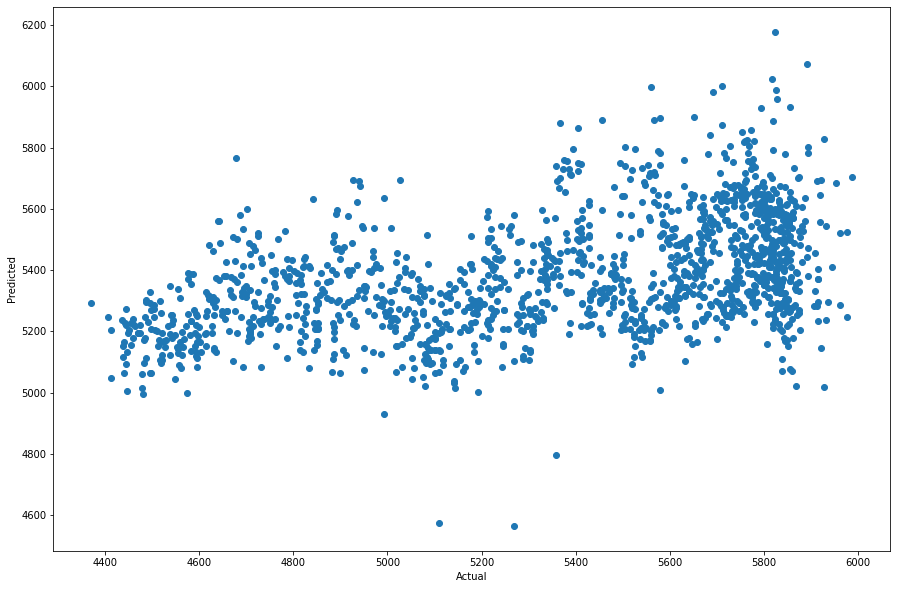

In [233]:
plt.figure(figsize=(15,10))
plt.scatter(y_test, predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')


(array([  6.,  84., 175., 139., 186., 264., 310., 258.,  70.,   8.]),
 array([-1088.96584902,  -889.18194664,  -689.39804426,  -489.61414189,
         -289.83023951,   -90.04633714,   109.73756524,   309.52146762,
          509.30536999,   709.08927237,   908.87317474]),
 <BarContainer object of 10 artists>)

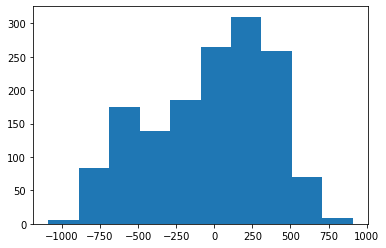

In [234]:
plt.hist(y_test - predictions)

In [235]:
from sklearn import metrics

In [236]:
metrics.mean_absolute_error(y_test, predictions)

325.78332572355527

In [237]:
metrics.mean_squared_error(y_test, predictions)

152940.789569333

In [238]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

391.076449775914